# TIM - TP11 : Récapitulatif des séances pratiques + Examen Blanc

Aujourd'hui, la séance est 2 parties et est faite pour vous préparer à l'examen pratique en janvier. Ce TP n'est pas à rendre non plus : en 4A, vous êtes grands, donc si vous ne voulez pas travailler, ça ne tient qu'à vous...

Un dépôt sera disponible et vous pourrez déposer votre TP si vous voulez un retour perso sur le travail est effectué en 2ème partie (en fonction du temps que je pourrais y consacrer...).

C'est parti !

## Partie 1 : Le récapitulatif

Lors de ces derniers séances, nous avons développé et utilisé plusieurs algorithmes de Traitement d'Images, mais le plus important ici est de savoir les appliquer en fonction de ce qu'on veut obtenir de notre image.

Cette première partie vise donc à faire un récapitulatif de tous les algorithmes qu'on a pu voir durant les séances précédentes.

## Partie 2 : L'examen blanc

Pour cette partie, voici un exercice du même style que ce qu'on pourra vous donner lors de l'examen pratique. L'examen durant 2h, vous n'aurez qu'un exercice d'analyse, mais on prévoit un exercice d'implémentation également, pour que vous nous montriez vos Python skills ;)

### Comptage de cellules dans une image de microscope

Dans le but de tester un médicament, des images de préparation observée sous microscope représentant des globules rouges sont acquises. Votre mission est de proposer un programme permettant de compter le nombre de cellules saines (disque) versus le nombre de cellules malades (croissant). On procédera par les étapes suivantes :
- binarisation avec seuil automatique
- prétraitement éventuels
- étiquettage en composantes connexes.

### 1) Binarisation

Une fonction de binarisation vise à transformer une image en niveaux de gris en une image binaire. Dans la plupart des méthodes, les pixels dont les niveaux de gris sont inférieurs à une valeur seuil sont transformés en pixels noirs dans l'image résultat alors que les
autres sont transformés en pixels blancs. Mais comment choisir le meilleur seuil pour une
image donnée ? 

Il existe plusieurs méthodes dans la littérature permettant de déterminer automatiquement le seuil de binarisation. Une des plus connues est la méthode d'Otsu proposée en 1979. Cette méthode a pour hypothèse que les pixels se répartisse en 2 classes (objet et fond), relativement bien distinctes dans l'histogramme.

#### a) Le principe de l'algorithme d'Otsu

On considère une image $I$ de taille $l \times h$ dont les niveaux de gris appartiennent à $[0,L]$. On appelle $h$ l'histogramme d'amplitude défini de telle sorte que $h(n)$ donne le nombre de pixels de $I$ dont le niveau de gris vaut $n$.

La probabilité $p(n)$ a priori d'un niveau de gris $n$ est alors définie par
\begin{equation*}
    p(n) = \frac{h(n)}{l.h}
\end{equation*}

La fonction $p(x)$ est alors une densité de probabilité. En effet, on peut alors vérifier que
\begin{equation*}
    \sum_{n=0}^{L} p(n) = 1
\end{equation*}

Il est alors possible de déterminer la moyenne et la variance des niveaux de gris.
\begin{equation*}
    \mu = \sum_{n=0}^{L}n.p(n)
\end{equation*}

\begin{equation*}
    \sigma^2 = \sum_{n=0}^{L}(n-\mu)^2 p(n)
\end{equation*}

La méthode d'Otsu repose sur l'hypothèse que les pixels de l'image appartiennent à deux classes $C_{1}$ et $C_{2}$. Si on décide que les pixels appartiennent à $C_{1}$ si leur niveau est inférieur ou égal à t et appartiennent à $C_{2}$ sinon, on peut calculer la probabilité a priori de $C_{1}$ et $C_{2}$.
\begin{equation*}
    P(C_{1}) = \sum_{n=0}^{t} p(n)
\end{equation*}
\begin{equation*}
    P(C_{2}) = \sum_{n=t+1}^{L} p(n)
\end{equation*}

Les moyennes et variances des niveaux de gris de $C_{1}$ et $C_{2}$ sont alors donnés par
\begin{equation*}
    \mu_{C_{1}} = \frac{\sum_{n=0}^{t} n.p(n)}{P(C_{1})}
\end{equation*}
\begin{equation*}
    \mu_{C_{2}} = \frac{\sum_{n=t+1}^{L} n.p(n)}{P(C_{2})}
\end{equation*}
\begin{equation*}
    \sigma^2_{C_{1}} = \frac{\sum_{n=0}^{t}(n-\mu_{C_{1}})^2 p(n)}{P(C_{1})}
\end{equation*}
\begin{equation*}
    \sigma^2_{C_{2}} = \frac{\sum_{n=t+1}^{L}(n-\mu_{C_{2}})^2 p(n)}{P(C_{2})}
\end{equation*}

On montre que
\begin{equation*}
    \mu = \mu_{C_{1}}.P(C_{1})+\mu_{C_{2}}.P(C_{2})
\end{equation*}

Par ailleurs, on appelle $\sigma^2_{intra}$ la variance intraclasse et $\sigma^2_{inter}$ la variance interclasse définies par
\begin{equation*}
    \sigma^2_{intra} = P(C_{1})\sigma^2_{C_{1}} + P(C_{2})\sigma^2_{C_{2}}
\end{equation*}

\begin{equation*}
    \sigma^2_{inter} = P(C_{1})(\mu_{C_{1}}-\mu)^2+P(C_{2})(\mu_{C_{2}}-\mu)^2
\end{equation*}

On montre que
\begin{equation*}
    \sigma^2 = \sigma^2_{intra} + \sigma^2_{inter}
\end{equation*}

$\sigma^2$, la variance des niveaux de gris de l'image, est indépendante du seuil de binarisation. En revanche, $\sigma^2_{intra}$ et $\sigma^2_{inter}$ dépendent de la séparation en classes. Selon Otsu, la séparation optimale est obtenue en minimisant la variance intraclasse et en maximisant la variance interclasse. Or la somme de ces deux variances est constante, de ce fait, maximiser la variance interclasse est équivalent à minimiser la variance intraclasse. Le seuil idéal est alors obtenu pour le maximum de $\sigma^2_{inter}$ ou pour le minimum de $\sigma^2_{intra}$.
Toutes les valeurs de seuil possibles sont parcourues, et à chaque valeur possible, on calcule la variance $\sigma^2_{intra}$ ou la variance $\sigma^2_{inter}$, au choix, et on choisit le seuil $t$ tel que ces variances sont max ou min :

\begin{equation*}
    t_{opt} = arg \min_{t \in [0,255]} \sigma^2_{intra}(t) = arg \max_{t \in [0,255]} \sigma^2_{inter}(t)
\end{equation*}

#### b) L'algorithme d'Otsu en détail

C'est bien beau tout ce discours sur ce qu'est l'algorithme d'Otsu, mais on l'implémente comment ?

Pour cela, on va tout simplement calculer la variance interclasse pour toutes les valeurs de seuils possibles (allant de 0 à L).

**1)** Commencez déjà par implémenter une fonction permettant d'obtenir l'histogramme des niveaux de gris d'une image. On considèrera que notre image est de type uint8.

In [58]:
# A compléter
# Fonction d'histogramme des niveaux de gris d'une image
def histogram(image,L):
    hist = np.zeros((L),dtype=np.uint64)
    val_unique = np.unique(image)
    for i in val_unique:
        hist[i] = np.sum(image==i)
    return hist

**2)** Maintenant, créez une fonction calculant la probabilité qu'un pixel soit de valeur n dans notre image.

In [39]:
# A compléter
# Fonction de calcul de la probabilité
def proba(histogramme,n):
    return histogramme[n]/np.sum(histogramme)

**3)** On continue avec des fonctions assez simples. Tout de suite : l'implémentation du calcul de $\mu$ à partir de l'histogramme.

In [62]:
# Calcul de mu
def mu(histogramme):
    return np.sum([i*proba(histogramme,i) for i in range(0,histogramme.size)])

**4)** Implémentez ensuite une fonction de calcul de la variance interclasse d'une image à un seuil t donné.

In [80]:
# A compléter
# Fonction de calcul de la variance interclasse
def var_interclasse(histogramme,t,L,img_mu):
    # Calcul de P(C1) et P(C2)
    P_C1 = np.sum([proba(histogramme,i) for i in range(0,t+1)])
    P_C2 = np.sum([proba(histogramme,i) for i in range(t+1,L)])
    
    # Calcul de mu_C1 et mu_C2
    mu_C1 = np.sum([i*proba(histogramme,i) for i in range(0,t+1)])/P_C1
    mu_C2 = np.sum([i*proba(histogramme,i) for i in range(t+1,L)])/P_C2
    
    # Calcul de la variance interclasse
    return P_C1*np.power(mu_C1-img_mu,2)+P_C2*np.power(mu_C2-img_mu,2)

**5)** Maintenant, implémentez tout simplement la fonction de détermination du seuil automatique.

In [114]:
# A compléter
# Fonction de détermination du seuil
def find_seuil(image):
    # Calcul de l'histogramme
    histogramme = histogram(image,256)

    # Calcul de la moyenne mu
    image_mu = mu(histogramme)
    
    # Calcul de la variance interclasse pour chaque seuil possible
    var_inter = np.zeros(256,dtype=np.float64)
    for i in range(image.min(),image.max()):
        var_inter[i] = var_interclasse(histogramme,i,256,image_mu)    
    
    # Calcul du seuil maximisant la variance interclasse
    return np.argmax(var_inter)

**6)** On finit par implémenter la fonction de binarisation Otsu

In [119]:
# A compléter
# Fonction de binarisation Otsu
def bin_otsu(image):
    seuil = find_seuil(image)
    return (image>=seuil).astype(np.uint8),seuil

**7)** Importez l'image ... et affichez la

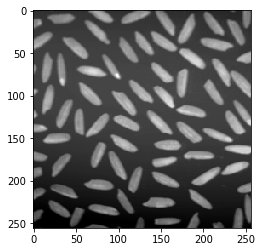

In [121]:
# A compléter
# Import et affichage de l'image ...

import numpy as np
import cv2
import matplotlib.pyplot as plt

rice = cv2.imread('../Base_images/rice.tif',0)
plt.imshow(rice,'gray')

**8)** Appliquez la binarisation Otsu sur cette image et affichez le résultat

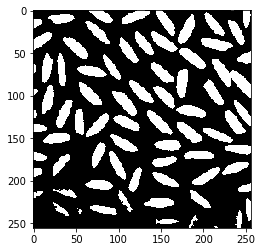

In [122]:
# A compléter
# Binarisation Otsu et affichage du résultat
rice_bin, seuil_bin = bin_otsu(rice)
plt.imshow(rice_bin,'gray')

**9)** Comparez votre résultat avec la fonction proposée par OpenCV (cv2.threshold)

In [124]:
# A compléter
# Comparaison du résultat de votre implémentation avec celui d'OpenCV

opencv_seuil_bin,opencv_rice_bin = cv2.threshold(rice,0,255,cv2.THRESH_OTSU)
print("Seuil trouvé par Otsu via votre implémentation : {}".format(seuil_bin))
print("Seuil trouvé par Otsu via OpenCV : {}".format(opencv_seuil_bin))

Seuil trouvé par Otsu via votre implémentation : 125
Seuil trouvé par Otsu via OpenCV : 125.0
